In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ufcdata/preprocessed_data.csv')
df.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,Blue,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,Blue,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


In [3]:
#Partitioning the dataset to X as predictors, and y as target
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: bool(1), float64(134), int64(24), object(1)
memory usage: 4.4+ MB


From the results above, we can see that there are two non-numeric features, winner and title_bout. The winner will be used as taget but the title bout will remain as a predictor and will be encoded with dummy variables.

In [5]:
#Encoding the title_bout feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])


#Encoding Y
labelencoder_y = LabelEncoder()
y[:] = labelencoder_y.fit_transform(y[:])


In [6]:
#Checking for proper dimensions of predictors, target and the encoding of title_bout
print("X Dimension: ",X.shape)
print()
print("y Dimension: ",y.shape)
print()
print("First row title bout value: 1 is True, 0 is False ==> ",X[0,0])
print("First row corner value: 1 is Red, 0 is Blue ==> ",y[3])
df.head()


X Dimension:  (3592, 159)

y Dimension:  (3592,)

First row title bout value: 1 is True, 0 is False ==>  1
First row corner value: 1 is Red, 0 is Blue ==>  0


,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,1,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,1,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,0,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,0,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


From the results above, we can see that we have properly encoded the feature

In [7]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#keras for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [10]:
#ANN Model
classifier = Sequential()
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

#compiling the model
classifier.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
pred1 = classifier.fit(X_train, y_train,
              batch_size = 900,
              nb_epoch = 100)


Epoch 1/100
2873/2873 [==============================] - 0s 95us/step - loss: 0.6907 - accuracy: 0.6335
Epoch 2/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6825 - accuracy: 0.6700
Epoch 3/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6707 - accuracy: 0.6700
Epoch 4/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6532 - accuracy: 0.6700
Epoch 5/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6309 - accuracy: 0.6700
Epoch 6/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6082 - accuracy: 0.6700
Epoch 7/100
2873/2873 [==============================] - 0s 6us/step - loss: 0.5945 - accuracy: 0.6700
Epoch 8/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.5913 - accuracy: 0.6700
Epoch 9/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.5907 - accuracy: 0.6700
Epoch 10/100
2873/2873 [==============================] - 0s 6us/step -

2873/2873 [==============================] - 0s 5us/step - loss: 0.2990 - accuracy: 0.8963
Epoch 78/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2906 - accuracy: 0.8987
Epoch 79/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2872 - accuracy: 0.8994
Epoch 80/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2766 - accuracy: 0.9029
Epoch 81/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2689 - accuracy: 0.9078
Epoch 82/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2636 - accuracy: 0.9119
Epoch 83/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2517 - accuracy: 0.9196
Epoch 84/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2478 - accuracy: 0.9217
Epoch 85/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2381 - accuracy: 0.9238
Epoch 86/100
2873/2873 [==============================] - 0s 6us/step - loss:

In [12]:
pred1.history

{'loss': [0.6907028853789547,
  0.6825197999211001,
  0.6706687764054261,
  0.6532139995975276,
  0.6309062287527802,
  0.6081828086831783,
  0.5945297500998393,
  0.5912585986685429,
  0.5907127238340674,
  0.5853507202176985,
  0.5792453475335397,
  0.5762570569044698,
  0.5749097518127553,
  0.572003105937335,
  0.5685958091572856,
  0.5661509557547073,
  0.5639194365872185,
  0.5617079359498374,
  0.5593706232680703,
  0.5570005499814555,
  0.55465935826758,
  0.5524481555704368,
  0.5503146229742961,
  0.5480069181166416,
  0.5458108451031991,
  0.5436924199712762,
  0.5412841944423985,
  0.5387346524417173,
  0.5363868851716452,
  0.5340507768646915,
  0.5310754009418441,
  0.5286092734112791,
  0.525624914697102,
  0.5224897667293635,
  0.5195533300043604,
  0.5160699910168195,
  0.5130285568823185,
  0.5101051692903726,
  0.5058932307286832,
  0.5019535272950459,
  0.49890962216109713,
  0.49610956971171505,
  0.49167720801814524,
  0.4874567493013169,
  0.4834988254456001,
  0

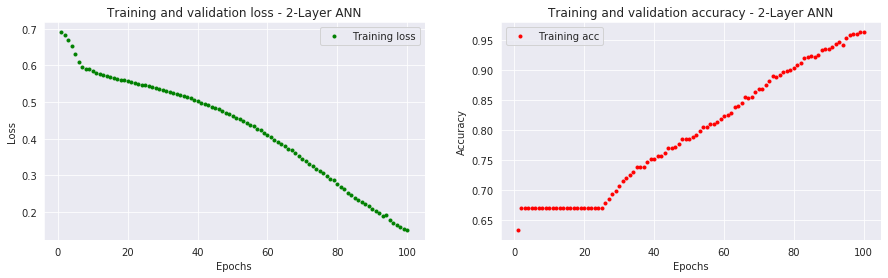

In [13]:
#Extracting CNN Results for Visualization
hist_ann = pred1.history
loss_values = hist_ann['loss']
acc_values = hist_ann['accuracy'] 


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')


plt.title('Training and validation loss - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.title('Training and validation accuracy - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('fight_pred1.png')
plt.show()

To ensure there is no bias or accident that the training results was really high, K-Fold will be utilize to ensure consistency of the model.

In [14]:
#K-Fold validation model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [15]:
#function to introduce model training in keras with sklearn k-fold
def build_predictor():
    #ANN Model
    predictor = Sequential()
    predictor.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
    predictor.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
    predictor.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

    #compiling the model
    predictor.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])
    return predictor

In [16]:
classifier_sk = KerasClassifier(build_fn = build_predictor, batch_size = 900, epochs = 100)

In [17]:
accuracies = cross_val_score(estimator = classifier_sk,
                             X = X_train,
                             y = y_train,
                             cv = 10)

Epoch 1/100
2585/2585 [==============================] - 0s 43us/step - loss: 0.6923 - accuracy: 0.5721
Epoch 2/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6882 - accuracy: 0.6723
Epoch 3/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6824 - accuracy: 0.6723
Epoch 4/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6750 - accuracy: 0.6723
Epoch 5/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6639 - accuracy: 0.6723
Epoch 6/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6496 - accuracy: 0.6723
Epoch 7/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6318 - accuracy: 0.6723
Epoch 8/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6149 - accuracy: 0.6723
Epoch 9/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.5995 - accuracy: 0.6723
Epoch 10/100
2585/2585 [==============================] - 0s 5us/step - 

2585/2585 [==============================] - 0s 5us/step - loss: 0.2596 - accuracy: 0.9153
Epoch 80/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.2532 - accuracy: 0.9195
Epoch 81/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.2459 - accuracy: 0.9222
Epoch 82/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.2391 - accuracy: 0.9242
Epoch 83/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2320 - accuracy: 0.9250
Epoch 84/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.2246 - accuracy: 0.9311
Epoch 85/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.2187 - accuracy: 0.9346
Epoch 86/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.2105 - accuracy: 0.9381
Epoch 87/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.2045 - accuracy: 0.9435
Epoch 88/100
2585/2585 [==============================] - 0s 5us/step - loss:

2585/2585 [==============================] - 0s 4us/step - loss: 0.4066 - accuracy: 0.8190
Epoch 58/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.4004 - accuracy: 0.8224
Epoch 59/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.3943 - accuracy: 0.8271
Epoch 60/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.3879 - accuracy: 0.8317
Epoch 61/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.3811 - accuracy: 0.8371
Epoch 62/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3747 - accuracy: 0.8441
Epoch 63/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.3677 - accuracy: 0.8511
Epoch 64/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3601 - accuracy: 0.8545
Epoch 65/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3525 - accuracy: 0.8580
Epoch 66/100
2585/2585 [==============================] - 0s 4us/step - loss:

2585/2585 [==============================] - 0s 5us/step - loss: 0.5092 - accuracy: 0.7431
Epoch 36/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.5057 - accuracy: 0.7458
Epoch 37/100
2585/2585 [==============================] - 0s 6us/step - loss: 0.5022 - accuracy: 0.7482
Epoch 38/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4988 - accuracy: 0.7513
Epoch 39/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4959 - accuracy: 0.7559
Epoch 40/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4922 - accuracy: 0.7574
Epoch 41/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4892 - accuracy: 0.7582
Epoch 42/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4857 - accuracy: 0.7617
Epoch 43/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.4822 - accuracy: 0.7644
Epoch 44/100
2585/2585 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 4us/step - loss: 0.5808 - accuracy: 0.6725
Epoch 14/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5761 - accuracy: 0.6725
Epoch 15/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5729 - accuracy: 0.6725
Epoch 16/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5702 - accuracy: 0.6725
Epoch 17/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5676 - accuracy: 0.6725
Epoch 18/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5650 - accuracy: 0.6725
Epoch 19/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5621 - accuracy: 0.6725
Epoch 20/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5593 - accuracy: 0.6725
Epoch 21/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5564 - accuracy: 0.6725
Epoch 22/100
2586/2586 [==============================] - 0s 4us/step - loss:

2586/2586 [==============================] - 0s 6us/step - loss: 0.1629 - accuracy: 0.9621
Epoch 92/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1558 - accuracy: 0.9656
Epoch 93/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1481 - accuracy: 0.9691
Epoch 94/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1414 - accuracy: 0.9718
Epoch 95/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1348 - accuracy: 0.9737
Epoch 96/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1284 - accuracy: 0.9772
Epoch 97/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1222 - accuracy: 0.9776
Epoch 98/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.1159 - accuracy: 0.9803
Epoch 99/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1103 - accuracy: 0.9830
Epoch 100/100
287/287 [==============================] - 0s 145us/step
Epoch 

2586/2586 [==============================] - 0s 5us/step - loss: 0.4128 - accuracy: 0.8275
Epoch 70/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4057 - accuracy: 0.8341
Epoch 71/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3983 - accuracy: 0.8426
Epoch 72/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3892 - accuracy: 0.8527
Epoch 73/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3794 - accuracy: 0.8608
Epoch 74/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3700 - accuracy: 0.8674
Epoch 75/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3598 - accuracy: 0.8735
Epoch 76/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3498 - accuracy: 0.8801
Epoch 77/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3380 - accuracy: 0.8867
Epoch 78/100
2586/2586 [==============================] - 0s 4us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.5014 - accuracy: 0.7479
Epoch 48/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4985 - accuracy: 0.7541
Epoch 49/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4955 - accuracy: 0.7579
Epoch 50/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4925 - accuracy: 0.7602
Epoch 51/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4891 - accuracy: 0.7664
Epoch 52/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4858 - accuracy: 0.7691
Epoch 53/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4823 - accuracy: 0.7734
Epoch 54/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4786 - accuracy: 0.7796
Epoch 55/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4749 - accuracy: 0.7842
Epoch 56/100
2586/2586 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.5486 - accuracy: 0.6663
Epoch 26/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5463 - accuracy: 0.6671
Epoch 27/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5440 - accuracy: 0.6756
Epoch 28/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5418 - accuracy: 0.6775
Epoch 29/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5394 - accuracy: 0.6810
Epoch 30/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5372 - accuracy: 0.6856
Epoch 31/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5348 - accuracy: 0.6957
Epoch 32/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5325 - accuracy: 0.7022
Epoch 33/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5301 - accuracy: 0.7088
Epoch 34/100
2586/2586 [==============================] - 0s 4us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.6826 - accuracy: 0.6671
Epoch 4/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.6747 - accuracy: 0.6671
Epoch 5/100
2586/2586 [==============================] - 0s 7us/step - loss: 0.6637 - accuracy: 0.6671
Epoch 6/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.6501 - accuracy: 0.6671
Epoch 7/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.6333 - accuracy: 0.6671
Epoch 8/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.6169 - accuracy: 0.6671
Epoch 9/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.6018 - accuracy: 0.6671
Epoch 10/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5940 - accuracy: 0.6671
Epoch 11/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5930 - accuracy: 0.6671
Epoch 12/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.590

Epoch 82/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1898 - accuracy: 0.9424
Epoch 83/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1827 - accuracy: 0.9490
Epoch 84/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1745 - accuracy: 0.9555
Epoch 85/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1678 - accuracy: 0.9594
Epoch 86/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1607 - accuracy: 0.9613
Epoch 87/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1545 - accuracy: 0.9652
Epoch 88/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1473 - accuracy: 0.9671
Epoch 89/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1411 - accuracy: 0.9722
Epoch 90/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1356 - accuracy: 0.9706
Epoch 91/100
2586/2586 [==============================] - 0s 5us

2586/2586 [==============================] - 0s 5us/step - loss: 0.4117 - accuracy: 0.8233
Epoch 61/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4064 - accuracy: 0.8256
Epoch 62/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4008 - accuracy: 0.8271
Epoch 63/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3953 - accuracy: 0.8329
Epoch 64/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3898 - accuracy: 0.8372
Epoch 65/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3842 - accuracy: 0.8442
Epoch 66/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3782 - accuracy: 0.8407
Epoch 67/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.3726 - accuracy: 0.8442
Epoch 68/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3660 - accuracy: 0.8519
Epoch 69/100
2586/2586 [==============================] - 0s 4us/step - loss:

2586/2586 [==============================] - 0s 6us/step - loss: 0.5106 - accuracy: 0.7359
Epoch 39/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5071 - accuracy: 0.7413
Epoch 40/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.5033 - accuracy: 0.7452
Epoch 41/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4998 - accuracy: 0.7556
Epoch 42/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4964 - accuracy: 0.7579
Epoch 43/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4925 - accuracy: 0.7595
Epoch 44/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4884 - accuracy: 0.7626
Epoch 45/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4845 - accuracy: 0.7707
Epoch 46/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4809 - accuracy: 0.7711
Epoch 47/100
2586/2586 [==============================] - 0s 5us/step - loss:

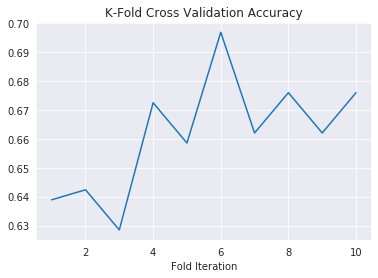

In [18]:
plt.plot(range(1,11),accuracies)
plt.xlabel('Fold Iteration')
plt.title("K-Fold Cross Validation Accuracy")
plt.savefig("ann_k_fold.png")
plt.show()

In [19]:
accuracies

array([0.6388889 , 0.6423611 , 0.62847221, 0.67247385, 0.65853661,
       0.69686413, 0.66202092, 0.67595822, 0.66202092, 0.67595822])